## Application of K-Means algorithm 

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Pour faire des graphiques 3D

Importing the Data generatede by the Parsing notebook

In [2]:
X = np.genfromtxt('features_p8`_pop.csv', delimiter=',')
y = np.genfromtxt('output_p8_pop.csv', delimiter=',')

clean_weird_data is a function that removes the lines relative to the n biggest elements of each feature (then it removes n*features lines)
Input: 
X - Feature vector
y - Output vector
n - Number of lines to me removed ( divided by the number of features)

In [3]:
#remove n biggest values of each dimension
def clean_weird_data(X,y,n):
    n = 50
    X_reduced = X.copy()
    y_reduced = y.copy()
    for _ in range(n):
        for k in range(len(y)):
            max0, max1, max2 = 0 ,0, 0
            if X_reduced[k][0] > max0:
                max0 = X_reduced[k][0]
                k0 = k
            if X_reduced[k][1] > max1:
                max1 = X_reduced[k][1]
                k1 = k
            if X_reduced[k][1] > max2:
                max2 = X_reduced[k][2]
                k2 = k        
        X_reduced = np.delete(X_reduced, (k0,k1,k2), axis = 0)
        y_reduced= np.delete(y, (k0,k1,k2)).tolist()
    return X_reduced, y_reduced

## Applying PCA

3-Dimension PCA

In [4]:
model_pca3 = PCA(n_components=3)

# On entraîne notre modèle (fit) sur les données
model_pca3.fit(X)

# On applique le résultat sur nos données :
X_reduced3 = model_pca3.transform(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

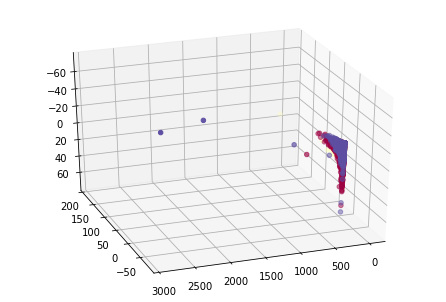

In [41]:
# Création de la figure 3D
fig = plt.figure(0)
ax = Axes3D(fig, elev=-150, azim=110)

# Affichage des valeurs
ax.scatter(X_reduced3[:, 0], X_reduced3[:, 1], X_reduced3[:, 2], c=y, cmap='Spectral')

Let's plot the 2-dimension graphs to have a better ideia on how the data looks like

Text(0, 0.5, 'Dimension 2')

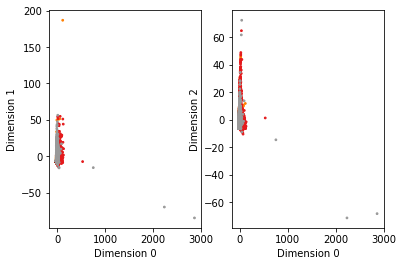

In [42]:
#plt.figure(1)
##########Real
plt.subplot(1, 2, 1)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
#plt.title('Real Output')

plt.subplot(1, 2, 2)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 2], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 2')
#plt.title('Predicted by 2-PCA Output')

2-Dimension PCA

In [43]:
model_pca2 = PCA(n_components=2)

# On entraîne notre modèle (fit) sur les données
model_pca2.fit(X)

# On applique le résultat sur nos données :
X_reduced2 = model_pca2.transform(X)

Text(0, 0.5, 'Dimension 1')

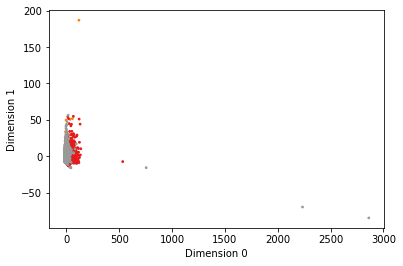

In [44]:
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
#plt.title('Real Output')

Applying K-Means Algorithm

For the 3d-PCA

Let's start with the data generated from the 3 players (Sarah, Paul and Julien). So n_clusters = 3

In [45]:
n_clusters = 3

In [46]:
model3=KMeans(n_clusters)
model3.fit(X_reduced3)
pred_pca3 = model3.predict(X_reduced3)

Text(0.5, 1.0, 'Predicted by 2-PCA Output')

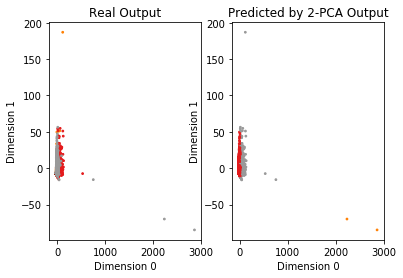

In [47]:
plt.subplot(1, 2, 1)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.title('Real Output')

plt.subplot(1, 2, 2)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=pred_pca3, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.title('Predicted by 2-PCA Output')

Text(0.5, 1.0, 'Predicted by 3-PCA Output')

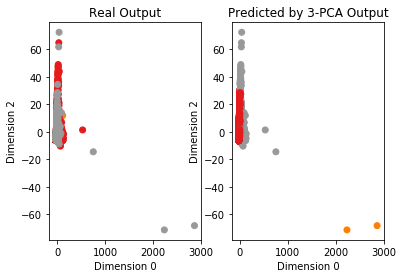

In [48]:
plt.subplot(1, 2, 1)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 2], c=y, cmap='Set1')
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 2')
plt.title('Real Output')

#plt.figure(2)
plt.subplot(1, 2, 2)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 2], c=pred_pca3, cmap='Set1')
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 2')
plt.title('Predicted by 3-PCA Output')

Let's try now for the 2d-PCA

In [49]:
model2=KMeans(n_clusters)
model2.fit(X_reduced2)
pred_pca2 = model2.predict(X_reduced2)

Text(0.5, 1.0, 'Predicted by 2-PCA Output')

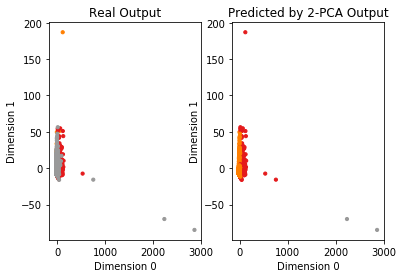

In [50]:
plt.subplot(1, 2, 1)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y, cmap='Set1', s = 10)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.title('Real Output')

plt.subplot(1, 2, 2)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=pred_pca2, cmap='Set1', s = 10)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.title('Predicted by 2-PCA Output')

We notice that the points superpose a lot. It seems that we won't be able to distinguish well between the players using 3d or 2d PCA

Let's visualize the Data from Julian's and Sarah's dataset

In [51]:
X = np.genfromtxt('features_julian_sarah.csv', delimiter=',')
y = np.genfromtxt('output_julian_sarah.csv', delimiter=',')

In [52]:
model_pca3 = PCA(n_components=3)

# On entraîne notre modèle (fit) sur les données
model_pca3.fit(X)

# On applique le résultat sur nos données :
X_reduced3 = model_pca3.transform(X)


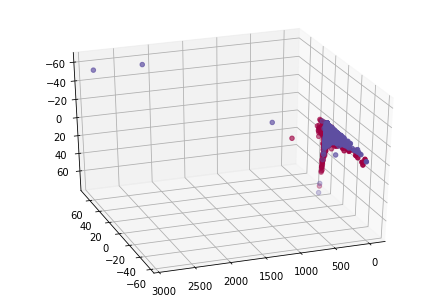

In [53]:
# Création de la figure 3D
fig = plt.figure(0)
ax = Axes3D(fig, elev=-150, azim=110)

# Affichage des valeurs
ax.scatter(X_reduced3[:, 0], X_reduced3[:, 1], X_reduced3[:, 2], c=y, cmap='Spectral')

Text(0, 0.5, 'Dimension 2')

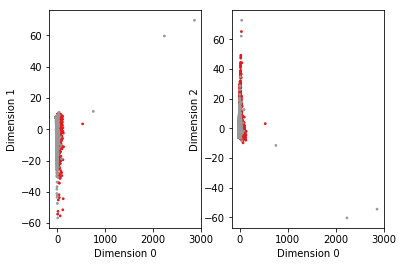

In [54]:
plt.subplot(1, 2, 1)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 1], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
#plt.title('Real Output')

plt.subplot(1, 2, 2)
plt.scatter(X_reduced3[:, 0], X_reduced3[:, 2], c=y, cmap='Set1', s = 3)
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 2')
#plt.title('Predicted by 2-PCA Output')